Epoch 1/20
91/91 [==============================] - 2s 7ms/step - loss: 1.4776 - accuracy: 0.2642 - val_loss: 1.4146 - val_accuracy: 0.2658
Epoch 2/20
91/91 [==============================] - 1s 6ms/step - loss: 1.3979 - accuracy: 0.2712 - val_loss: 1.3887 - val_accuracy: 0.2771
Epoch 3/20
91/91 [==============================] - 0s 5ms/step - loss: 1.3783 - accuracy: 0.2819 - val_loss: 1.3781 - val_accuracy: 0.2893
Epoch 4/20
91/91 [==============================] - 0s 5ms/step - loss: 1.3686 - accuracy: 0.2932 - val_loss: 1.3688 - val_accuracy: 0.3140
Epoch 5/20
91/91 [==============================] - 0s 5ms/step - loss: 1.3620 - accuracy: 0.3302 - val_loss: 1.3645 - val_accuracy: 0.3314
Epoch 6/20
91/91 [==============================] - 0s 5ms/step - loss: 1.3549 - accuracy: 0.3542 - val_loss: 1.3566 - val_accuracy: 0.3460
Epoch 7/20
91/91 [==============================] - 0s 5ms/step - loss: 1.3471 - accuracy: 0.3702 - val_loss: 1.3459 - val_accuracy: 0.3694
Epoch 8/20
91/91 [==

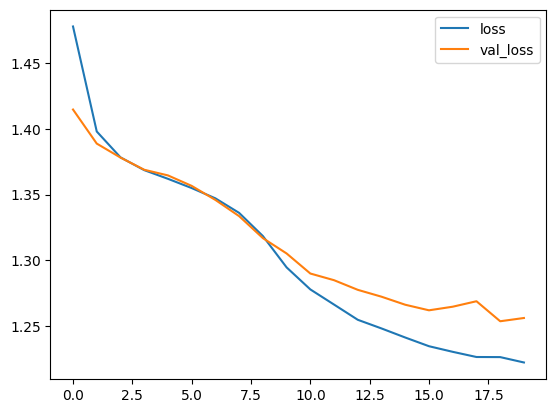

In [ ]:
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.models import load_model
  import pickle
  from tensorflow.keras.layers import Dense
  from tensorflow.keras.layers import Dropout
  from tensorflow.keras.layers import BatchNormalization
  import tensorflow as tf
  import seaborn as sns
  from tensorflow.keras.callbacks import EarlyStopping
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.preprocessing import LabelEncoder
  from sklearn.preprocessing import OneHotEncoder
  from sklearn.preprocessing import OrdinalEncoder
  from sklearn.metrics import classification_report,confusion_matrix
  import numpy as np
  import matplotlib.pylab as plt

  customer_df = pd.read_csv('/content/customers.csv')

  customer_df.columns
  customer_df.dtypes
  customer_df.shape

  customer_df.isnull().sum()

  customer_df_cleaned = customer_df.dropna(axis=0)
  customer_df_cleaned.isnull().sum()

  customer_df_cleaned.shape
  customer_df_cleaned.dtypes

  customer_df_cleaned['Gender'].unique()
  customer_df_cleaned['Ever_Married'].unique()
  customer_df_cleaned['Graduated'].unique()
  customer_df_cleaned['Profession'].unique()
  customer_df_cleaned['Spending_Score'].unique()
  customer_df_cleaned['Var_1'].unique()
  customer_df_cleaned['Segmentation'].unique()


  categories_list=[['Male', 'Female'],
            ['No', 'Yes'],
            ['No', 'Yes'],
            ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
              'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
            ['Low', 'Average', 'High']
            ]

  enc = OrdinalEncoder(categories=categories_list)

  customers_1 = customer_df_cleaned.copy()

  customers_1[['Gender',
              'Ever_Married',
                'Graduated','Profession',
                'Spending_Score']] = enc.fit_transform(customers_1[['Gender',
                                                                  'Ever_Married',
                                                                  'Graduated','Profession',
                                                                  'Spending_Score']])

  customers_1.dtypes

  le = LabelEncoder()

  customers_1['Segmentation'] = le.fit_transform(customers_1['Segmentation'])
  customers_1.dtypes

  customers_1 = customers_1.drop('ID',axis=1)
  customers_1 = customers_1.drop('Var_1',axis=1)

  customers_1.dtypes

  customers_1['Segmentation'].unique()

  X=customers_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values
  y1 = customers_1[['Segmentation']].values


  one_hot_enc = OneHotEncoder()
  one_hot_enc.fit(y1)
  y1.shape


  y = one_hot_enc.transform(y1).toarray()
  y.shape
  y1[0]
  y[0]
  X.shape

  X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                test_size=0.66,
                                                random_state=50)

  X_train[0]
  X_train.shape

  scaler_age = MinMaxScaler()
  scaler_age.fit(X_train[:,2].reshape(-1,1))

  X_train_scaled = np.copy(X_train)
  X_test_scaled = np.copy(X_test)

  X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
  X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

  my_ai=Sequential([
      Dense(units=9,activation='relu',input_shape=[8]),
      Dense(units=6,activation='relu'),
      Dense(units=5,activation='relu'),
      Dense(units=4,activation='softmax')
  ])

  my_ai.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

  my_ai.fit(x=X_train_scaled,y=y_train,
              epochs=20,
              batch_size= 33,
              validation_data=(X_test_scaled,y_test),
              )

  metrics = pd.DataFrame(my_ai.history.history)
  metrics.head()
  metrics[['loss','val_loss']].plot()

  x_test_predictions = np.argmax(my_ai.predict(X_test_scaled), axis=1)
  x_test_predictions.shape
  y_test_truevalue = np.argmax(y_test,axis=1)
  y_test_truevalue.shape

  print(confusion_matrix(y_test_truevalue,x_test_predictions))
  print(classification_report(y_test_truevalue,x_test_predictions))

  x_single_prediction = np.argmax(my_ai.predict(X_test_scaled[1:2,:]), axis=1)

  print(x_single_prediction)
  print(le.inverse_transform(x_single_prediction))
